In [2]:
from utils.sample import mnist_noniid
from torchvision import datasets, transforms

In [3]:
trans_mnist = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.MNIST(
    '../data/mnist/', train=True, download=True, transform=trans_mnist)

In [35]:
import numpy as np
dict = np.load('data/non_iid_mnist_q0.npy', allow_pickle=True).item()
for i in range(100):
    client  = [0,0,0,0,0,0,0,0,0,0]
    for j in range(len(dict[i])):
        my_list = list(dict[i])
        idx = my_list[j]
        label = dataset_train[idx][1]
        client[label] += 1
    print("client: ", i , client)
    client = []

client:  0 [0, 0, 0, 0, 0, 0, 235, 365, 0, 0]
client:  1 [300, 0, 0, 300, 0, 0, 0, 0, 0, 0]
client:  2 [300, 0, 0, 0, 0, 0, 0, 300, 0, 0]
client:  3 [0, 0, 0, 300, 300, 0, 0, 0, 0, 0]
client:  4 [300, 300, 0, 0, 0, 0, 0, 0, 0, 0]
client:  5 [300, 0, 300, 0, 0, 0, 0, 0, 0, 0]
client:  6 [0, 0, 300, 0, 0, 0, 0, 0, 300, 0]
client:  7 [0, 0, 300, 0, 0, 17, 283, 0, 0, 0]
client:  8 [300, 0, 0, 0, 0, 0, 300, 0, 0, 0]
client:  9 [0, 0, 0, 0, 0, 0, 300, 0, 0, 300]
client:  10 [0, 0, 0, 0, 0, 0, 0, 0, 600, 0]
client:  11 [0, 0, 0, 0, 0, 300, 0, 0, 0, 300]
client:  12 [0, 0, 0, 300, 0, 300, 0, 0, 0, 0]
client:  13 [0, 0, 0, 0, 0, 300, 300, 0, 0, 0]
client:  14 [600, 0, 0, 0, 0, 0, 0, 0, 0, 0]
client:  15 [0, 0, 0, 0, 0, 0, 0, 300, 0, 300]
client:  16 [0, 300, 0, 0, 0, 300, 0, 0, 0, 0]
client:  17 [0, 0, 23, 277, 0, 300, 0, 0, 0, 0]
client:  18 [0, 300, 0, 0, 300, 0, 0, 0, 0, 0]
client:  19 [0, 0, 0, 0, 0, 300, 0, 0, 300, 0]
client:  20 [0, 0, 0, 300, 0, 0, 0, 0, 0, 300]
client:  21 [0, 0, 0, 300

In [36]:
import random
andom_numbers = [random.randint(0, 100) for _ in range(4)]

In [37]:
for i in andom_numbers:
    client  = [0,0,0,0,0,0,0,0,0,0]
    for j in range(len(dict[i])):
        my_list = list(dict[i])
        idx = my_list[j]
        label = dataset_train[idx][1]
        client[label] += 1
    print("client: ", i , client)
    client = []

client:  57 [0, 0, 0, 0, 300, 0, 0, 0, 0, 300]
client:  42 [0, 0, 0, 0, 0, 0, 0, 0, 600, 0]
client:  82 [0, 0, 0, 300, 0, 0, 300, 0, 0, 0]
client:  97 [0, 0, 0, 0, 0, 0, 300, 300, 0, 0]


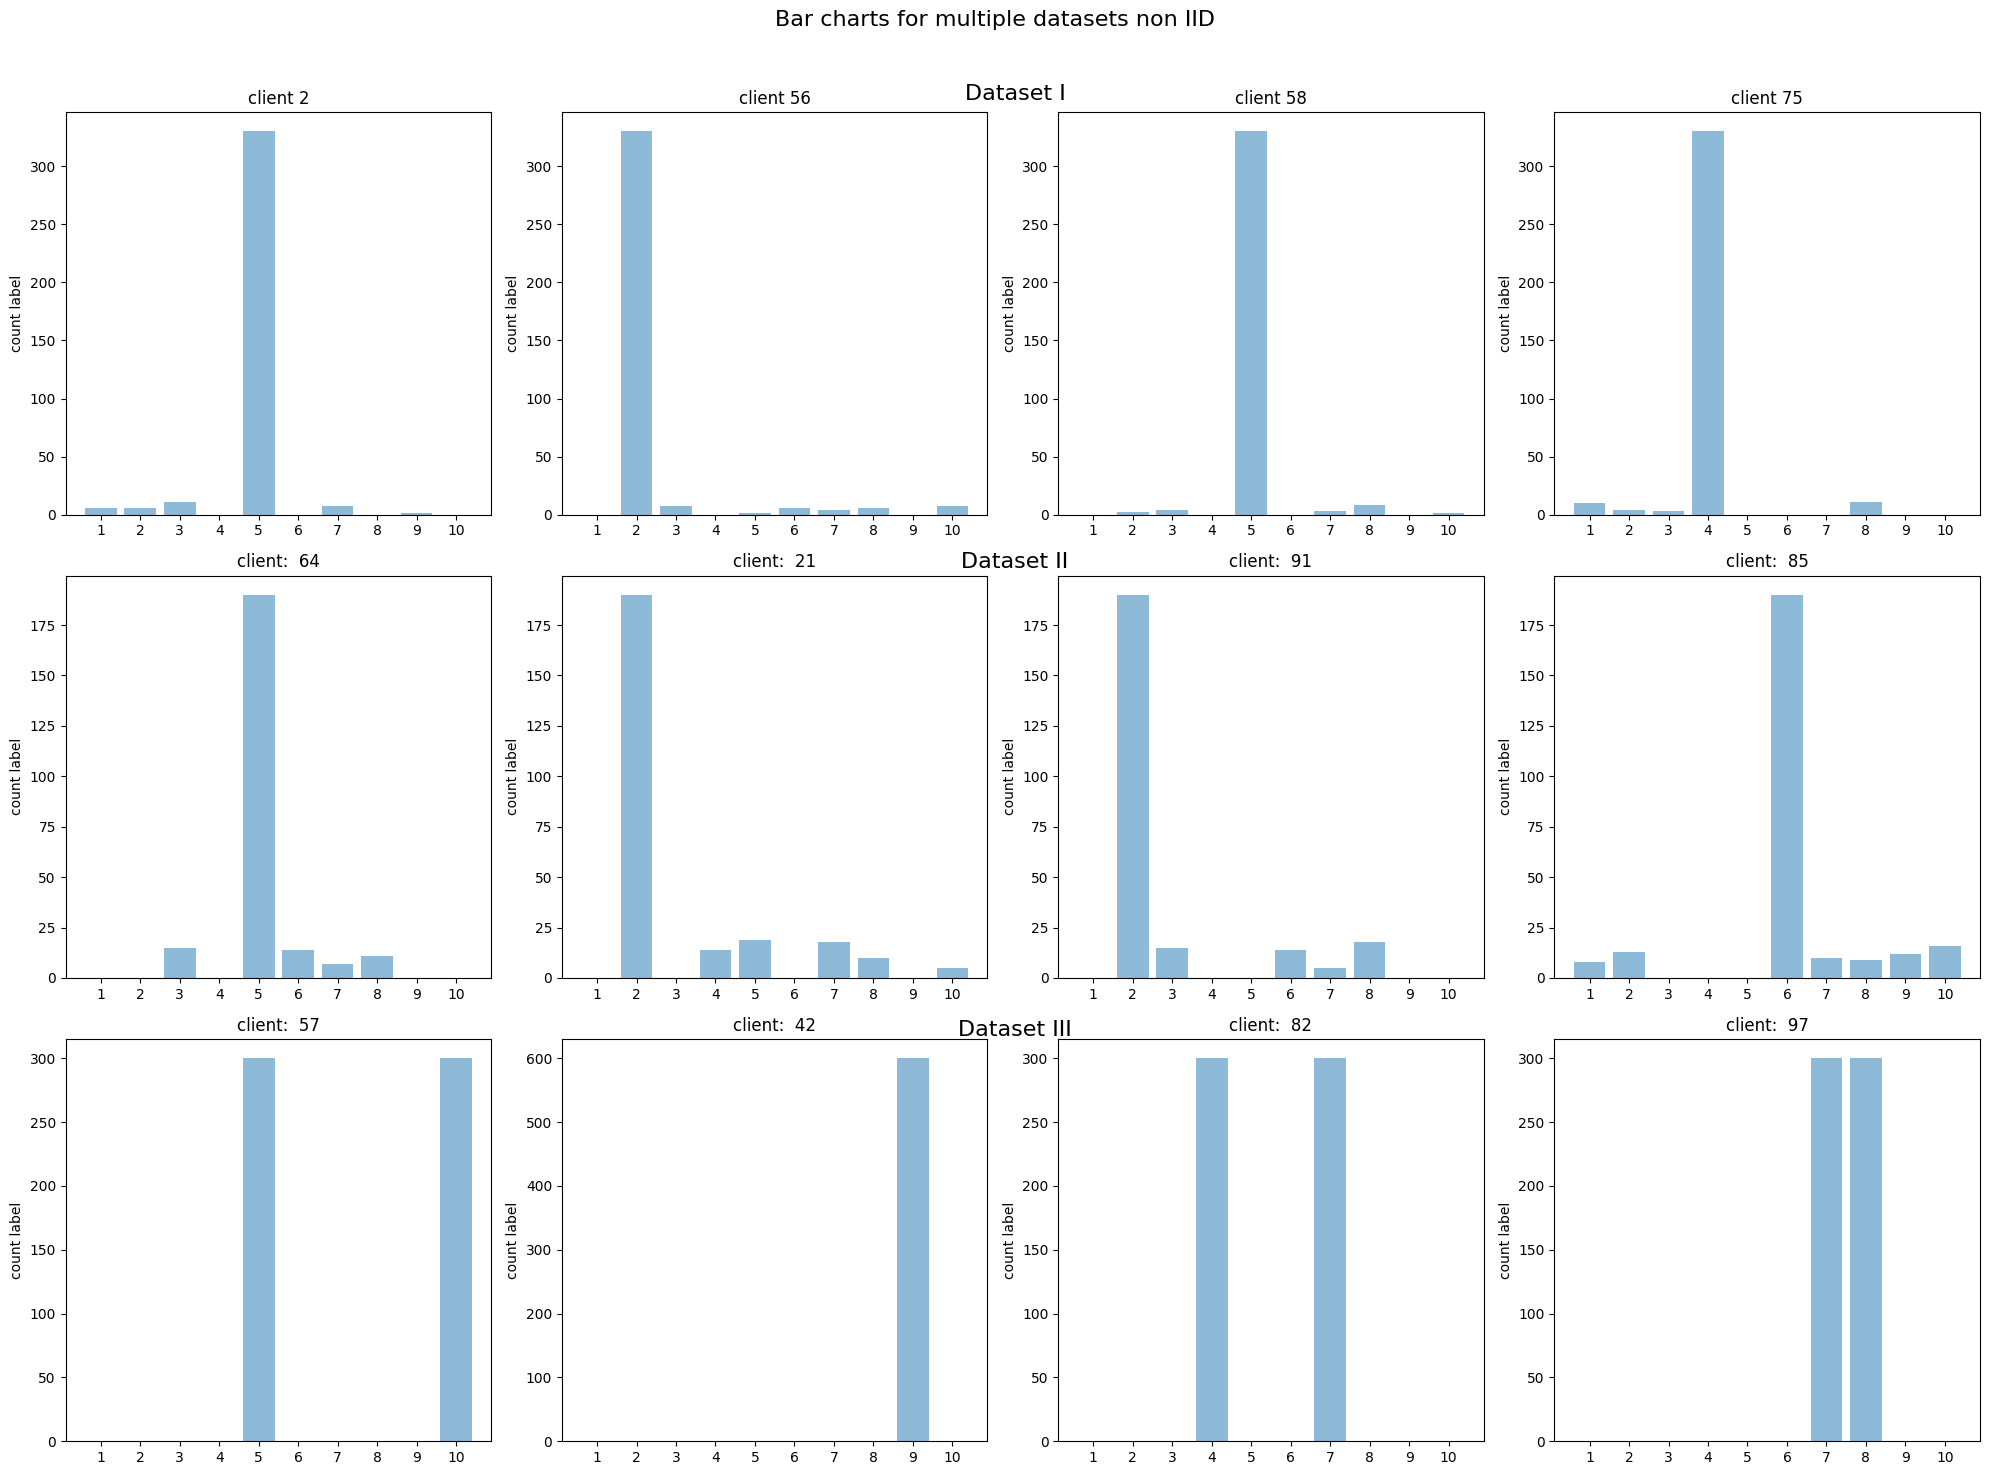

In [40]:
import matplotlib.pyplot as plt
import numpy as np

data2 = {
    'client:  64': [0, 0, 15, 0, 190, 14, 7, 11, 0, 0],
    'client:  21': [0, 190, 0, 14, 19, 0, 18, 10, 0, 5],
    'client:  91': [0, 190, 15, 0, 0, 14, 5, 18, 0, 0],
    'client:  85': [8, 13, 0, 0, 0, 190, 10, 9, 12, 16],
}

data = {
    'client 2': [6, 6, 11, 0, 330, 0, 7, 0, 1, 0],
    'client 56': [0, 330, 7, 0, 1, 6, 4, 6, 0, 7],
    'client 58': [0, 2, 4, 0, 330, 0, 3, 8, 0, 1],
    'client 75': [10, 4, 3, 330, 0, 0, 0, 11, 0, 0],
}


data3 = {
    'client:  57': [0, 0, 0, 0, 300, 0, 0, 0, 0, 300],
    'client:  42': [0, 0, 0, 0, 0, 0, 0, 0, 600, 0],
    'client:  82': [0, 0, 0, 300, 0, 0, 300, 0, 0, 0],
    'client:  97': [0, 0, 0, 0, 0, 0, 300, 300, 0, 0],
}

datasets = [data, data2, data3]
titles = ['Dataset I', 'Dataset II', 'Dataset III']

fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows, 4 columns

for i, (dataset, title) in enumerate(zip(datasets, titles)):
    for j, (client, values) in enumerate(dataset.items()):
        row = i
        col = j
        axs[row, col].bar(np.arange(len(values)), values, align='center', alpha=0.5)
        axs[row, col].set_title(client)
        axs[row, col].set_xticks(np.arange(len(values)))
        axs[row, col].set_xticklabels(np.arange(1, len(values) + 1))
        axs[row, col].set_ylabel('count label')
    
    # Add title for each row
    fig.text(0.51, 0.92 - i * 0.312, title, ha='center', fontsize=16)

    # Hide any unused subplots in the row
    for k in range(j + 1, 4):
        axs[row, k].axis('off')

fig.suptitle('Bar charts for multiple datasets non IID', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig.savefig("bar_charts_datasets.pdf")

In [6]:
import os

def them_dong_vao_nhieu_file(thu_muc, line_num, noi_dung):
    for ten_file in os.listdir(thu_muc):
        if ten_file.endswith('.txt'):
            duong_dan_tep = os.path.join(thu_muc, ten_file)
            with open(duong_dan_tep, 'r') as file:
                lines = file.readlines()
            lines.insert(line_num - 1, noi_dung + '\n')
            with open(duong_dan_tep, 'w') as file:
                file.writelines(lines)

them_dong_vao_nhieu_file('C:/HUST/20231/Lab/FL/save_flame_out_rlr', 10, '    Style send: trust')


In [ ]:
import os

def sua_dong_trong_nhieu_file(thu_muc, line_num, noi_dung):
    for ten_file in os.listdir(thu_muc):
        if ten_file.endswith('.txt'):
            duong_dan_tep = os.path.join(thu_muc, ten_file)
            with open(duong_dan_tep, 'r') as file:
                lines = file.readlines()
            lines[line_num - 1] = noi_dung + '\n'
            with open(duong_dan_tep, 'w') as file:
                file.writelines(lines)

sua_dong_trong_nhieu_file('./save_out_mistrust/', 10, '    Style send: mistrust')